In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.image as img
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.
/home/vipul/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Importing the Datasets

In [2]:
path_to_file_train="/media/vipul/Local Disk (D:)/Data Science and ML/DATA/mnist_train.csv"
path_to_file_test="/media/vipul/Local Disk (D:)/Data Science and ML/DATA/mnist_test.csv"
train_dataset=pd.read_csv(path_to_file_train)
test_dataset=pd.read_csv(path_to_file_test)

In [3]:
Y_train=train_dataset["label"]

In [4]:
train_dataset = train_dataset.drop(labels = ["label"],axis = 1)

In [5]:
#g=sns.countplot(Y_train)

In [6]:
Y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

(array([ 5923.,  6742.,  5958.,  6131.,  5842.,  5421.,  5918.,  6265.,
         5851.,  5949.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

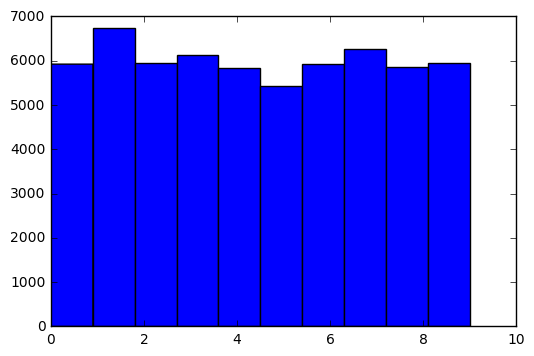

In [7]:
plt.hist(Y_train)

In [8]:
train_dataset.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test_dataset.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

# Normalising

 grayscale normalization to reduce the effect of illumination's differences

 CNN converg faster on [0..1] data than on [0..255]

In [10]:
train_dataset=train_dataset/255.0
test_dataset=train_dataset/255.0

# Reshape

In [11]:
train_dataset=train_dataset.values.reshape(-1,28,28,1)
test_dataset=test_dataset.values.reshape(-1,28,28,1)


# One Hot Encoding

In [12]:
Y_train=to_categorical(Y_train,num_classes=10)

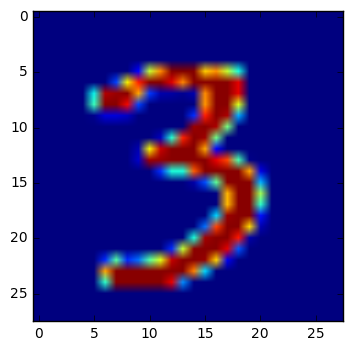

In [13]:
g = plt.imshow(train_dataset[10000][:,:,0])


# Splitting the Dataset into training and test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(train_dataset,Y_train,test_size=0.1,random_state=2)


# Creating the Convolutional network


In [15]:
classifier=Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(28,28,1),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=10,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/home/vipul/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app
/home/vipul/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu")`
/home/vipul/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="sigmoid")`


# Fitting the CNN To the Images

In [49]:
#train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#test_datagen=ImageDataGenerator(rescale=1./255)

classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32,verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 70s - loss: 0.0388 - acc: 0.9873 - val_loss: 0.0179 - val_acc: 0.9945
Epoch 2/10
 - 55s - loss: 0.0132 - acc: 0.9958 - val_loss: 0.0131 - val_acc: 0.9956
Epoch 3/10
 - 55s - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0100 - val_acc: 0.9965
Epoch 4/10
 - 60s - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0106 - val_acc: 0.9965
Epoch 5/10
 - 56s - loss: 0.0049 - acc: 0.9985 - val_loss: 0.0090 - val_acc: 0.9970
Epoch 6/10
 - 56s - loss: 0.0036 - acc: 0.9988 - val_loss: 0.0092 - val_acc: 0.9972
Epoch 7/10
 - 56s - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0094 - val_acc: 0.9970
Epoch 8/10
 - 55s - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0107 - val_acc: 0.9967
Epoch 9/10
 - 57s - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0105 - val_acc: 0.9972
Epoch 10/10
 - 56s - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0102 - val_acc: 0.9973
